<a href="https://colab.research.google.com/github/MoeSaleh24/School-Projects/blob/main/Portuguese_Bank_Dataset_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy import stats
import math


path = "/content/drive/MyDrive/INNFO367/FinalProject/Banking_Dataset_Classification.csv"
df = pd.read_csv(path)

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


In [ ]:
df_cleaned = df.drop(['contact', 'duration'], axis=1)

df_cleaned.head()

,age,job,marital,education,default,housing,loan,month,day_of_week,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,nov,wed,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,nov,wed,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,jul,mon,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,may,mon,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,jun,tue,2,999,0,nonexistent,no


- The contact columnb does not add any affectivness here, so I am choosing to drop it.

- After dropping the duration columnb, the results od the model worsen.
  - I was going to add it back, but you have told me to drop it form the whoel df completely.
    - I have added it to the optimized models later on to at least get better scores.

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   month        32950 non-null  object
 8   day_of_week  32950 non-null  object
 9   campaign     32950 non-null  int64 
 10  pdays        32950 non-null  int64 
 11  previous     32950 non-null  int64 
 12  poutcome     32950 non-null  object
 13  y            32950 non-null  object
dtypes: int64(4), object(10)
memory usage: 3.5+ MB


In [ ]:
df_random_select = df_cleaned.sample(n=30000, random_state= 2)

df_random_select.head()

,age,job,marital,education,default,housing,loan,month,day_of_week,campaign,pdays,previous,poutcome,y
6227,49,entrepreneur,married,high.school,unknown,no,no,may,wed,12,999,0,nonexistent,no
19905,44,technician,married,university.degree,no,no,yes,may,fri,2,999,1,failure,no
6951,37,technician,married,professional.course,no,yes,no,aug,fri,1,999,0,nonexistent,no
13945,34,admin.,married,high.school,unknown,no,no,may,mon,1,999,0,nonexistent,no
28648,45,services,married,professional.course,no,yes,no,aug,thu,11,999,0,nonexistent,no


In [ ]:
mapping = {'no': 0, 'yes': 1}

df_random_select['y'] = df_random_select['y'].map(mapping).astype(int)

In [ ]:
mean_value = df_random_select['y'].mean()

print(f"The mean of the data is: {mean_value}")

The mean of the data is: 0.11216666666666666


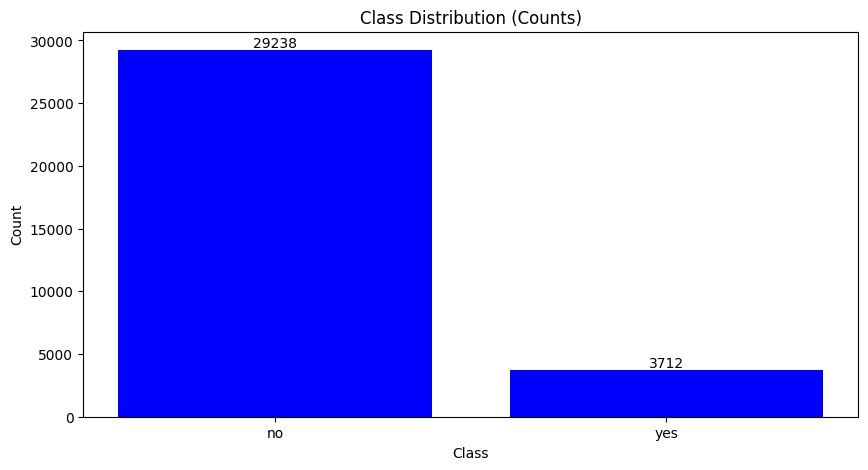

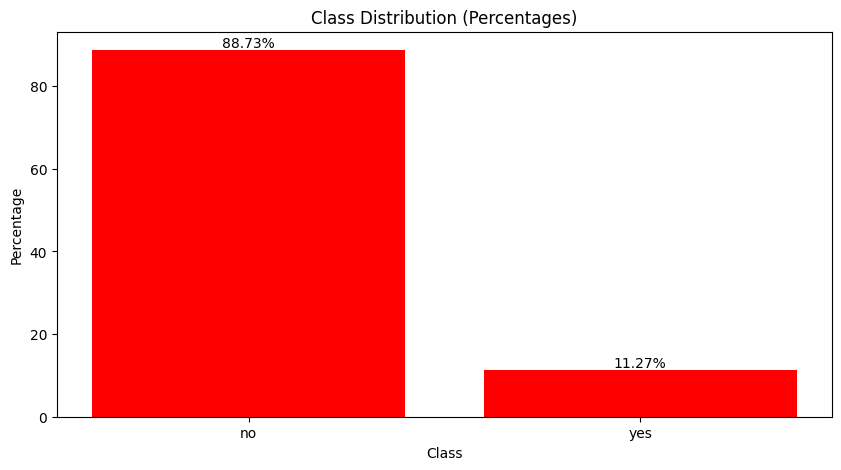

In [ ]:
class_distribution = df['y'].value_counts()

# Calculate percentages
class_percentages = class_distribution / class_distribution.sum() * 100

# Plotting for Counts
fig, ax1 = plt.subplots(figsize=(10, 5))

# Bar plot with counts
bars_counts = ax1.bar(class_distribution.index, class_distribution.values, color='blue')

# Add counts on top of bars
for bar in bars_counts:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', color='black')

ax1.set_title('Class Distribution (Counts)')
ax1.set_xlabel('Class')
ax1.set_ylabel('Count')

# Plotting for Percentages
fig, ax2 = plt.subplots(figsize=(10, 5))

# Bar plot with percentages
bars_percentages = ax2.bar(class_percentages.index, class_percentages.values, color='red')

# Add percentages on top of bars
for bar in bars_percentages:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{round(yval, 2)}%', ha='center', va='bottom', color='black')

ax2.set_title('Class Distribution (Percentages)')
ax2.set_xlabel('Class')
ax2.set_ylabel('Percentage')

plt.show()

In [ ]:
df_random_select.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 6227 to 9504
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          30000 non-null  int64 
 1   job          30000 non-null  object
 2   marital      30000 non-null  object
 3   education    30000 non-null  object
 4   default      30000 non-null  object
 5   housing      30000 non-null  object
 6   loan         30000 non-null  object
 7   month        30000 non-null  object
 8   day_of_week  30000 non-null  object
 9   campaign     30000 non-null  int64 
 10  pdays        30000 non-null  int64 
 11  previous     30000 non-null  int64 
 12  poutcome     30000 non-null  object
 13  y            30000 non-null  int64 
dtypes: int64(5), object(9)
memory usage: 3.4+ MB


In [ ]:
df_random_select = pd.get_dummies(df_random_select, drop_first=True)

df_random_select.head()

,age,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
6227,49,12,999,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,1,0
19905,44,2,999,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6951,37,1,999,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
13945,34,1,999,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
28648,45,11,999,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [ ]:
X = df_random_select.drop('y', axis=1)     # Features (independent variables)
y = df_random_select['y']

X.head()

,age,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
6227,49,12,999,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
19905,44,2,999,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6951,37,1,999,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
13945,34,1,999,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
28648,45,11,999,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
logmodel = LogisticRegression(solver='liblinear')

logmodel.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [ ]:
y_pred = logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, logmodel.predict_proba(X_test)[:,1])
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.7448804101343726


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7969
           1       0.63      0.18      0.29      1031

    accuracy                           0.89      9000
   macro avg       0.77      0.59      0.61      9000
weighted avg       0.87      0.89      0.87      9000



In [ ]:
confusion_matrix(y_test,y_pred)

array([[7857,  112],
       [ 841,  190]])

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train, X_train)
logmodel_2=logit_model.fit()
print(logmodel_2.summary2())

In [ ]:
df_cleaned2 = df_random_select.drop(['age', 'previous', 'job_management', 'job_self-employed', 'job_unemployed', 'job_unknown', 'marital_married',
                                      'marital_single', 'marital_unknown', 'education_basic.6y', 'education_basic.9y', 'education_high.school',
                                     'education_illiterate', 'education_professional.course', 'education_university.degree', 'education_unknown',
                                     'default_yes', 'loan_yes', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed' ], axis=1)

df_cleaned2.head()

- I have attempted to remove the insignificant features, but they have not affected the model.
  - I have run this before and have gotten the same results, but I have restarted the run, and it killed all the results.
    - I would attempt this again to showcase it, but it takes a lot of time.
      -That said, I will not attempt to run it again.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_ = scaler.fit_transform(X)

X_rescaled = pd.DataFrame(X_, columns=X.columns)

X_rescaled.describe()

,age,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000
mean,0.284276,0.028301,0.962626,0.025138,0.227367,0.035400,0.026600,0.071033,0.041667,0.033067,...,0.334267,0.099533,0.017700,0.014000,0.206400,0.208500,0.19490,0.198833,0.862333,0.033833
std,0.128600,0.049751,0.189086,0.072009,0.419138,0.184792,0.160914,0.256885,0.199830,0.178814,...,0.471741,0.299382,0.131861,0.117492,0.404728,0.406243,0.39613,0.399129,0.344556,0.180803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.185185,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000
50%,0.259259,0.018182,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000
75%,0.370370,0.036364,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

from sklearn.metrics import roc_auc_score

print('ROC AUC: ', roc_auc_score(y_test,knn.predict_proba(X_test)[:,1]))

ROC AUC:  0.6631971927105019


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7969
           1       0.53      0.21      0.30      1031

    accuracy                           0.89      9000
   macro avg       0.72      0.59      0.62      9000
weighted avg       0.86      0.89      0.87      9000



In [ ]:
print(confusion_matrix(y_test,y_pred))

[[7782  187]
 [ 816  215]]


In [ ]:
from sklearn.model_selection import cross_val_score
max_K = 50
cv_scores = [ ]

for K in range(1,max_K):
    knn = KNeighborsClassifier(n_neighbors = K)
    scores = cross_val_score(knn,X_train,y_train.values.ravel(),cv = 5,scoring = "roc_auc")
    cv_scores.append(scores.mean())


In [ ]:
print('Optimal k: ', cv_scores.index(max(cv_scores))+1)

Optimal k:  48


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=48, metric='euclidean')
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

from sklearn.metrics import roc_auc_score

print('ROC AUC: ', roc_auc_score(y_test,knn.predict_proba(X_test)[:,1]))

ROC AUC:  0.7025870373789608


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.94      7969
           1       0.64      0.21      0.31      1031

    accuracy                           0.90      9000
   macro avg       0.77      0.60      0.63      9000
weighted avg       0.88      0.90      0.87      9000



- I will be using the KNN model after finding optimal K in the final comparison.

In [ ]:
print(confusion_matrix(y_test,y_pred))

[[7851  118]
 [ 819  212]]


In [ ]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

rf_model  = RandomForestClassifier(max_depth=5, random_state=0)
rf_model.fit(X_train,y_train)

y_pred_rf = rf_model.predict(X_test)

print('ROC AUC: ', roc_auc_score(y_test,rf_model.predict_proba(X_test)[:,1]))

ROC AUC:  0.7361507169087196


In [ ]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7969
           1       0.68      0.17      0.28      1031

    accuracy                           0.90      9000
   macro avg       0.79      0.58      0.61      9000
weighted avg       0.88      0.90      0.87      9000



In [ ]:
confusion_matrix(y_test,y_pred_rf)

array([[7887,   82],
       [ 853,  178]])

In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
rf_random = RandomizedSearchCV(estimator = rf_model, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)

rf_random.fit(X_train, y_train)


roc_auc = roc_auc_score(y_test, rf_random.predict_proba(X_test)[:, 1])
print("ROC AUC:", roc_auc)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


ROC AUC: 0.7343136394557037


In [ ]:
print(classification_report(y_test, rf_random.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7969
           1       0.65      0.19      0.30      1031

    accuracy                           0.90      9000
   macro avg       0.78      0.59      0.62      9000
weighted avg       0.88      0.90      0.87      9000



- I will be using this in the final comparison.

In [ ]:
# Boosted tree model

from sklearn.ensemble import AdaBoostClassifier

bt_model = AdaBoostClassifier(n_estimators=100)

bt_model.fit(X_train,y_train)

y_pred_bt = bt_model.predict(X_test)

print('ROC AUC: ', roc_auc_score(y_test,bt_model.predict_proba(X_test)[:,1]))

ROC AUC:  0.7446935195901576


In [ ]:
print(classification_report(y_test,y_pred_bt))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7969
           1       0.59      0.19      0.29      1031

    accuracy                           0.89      9000
   macro avg       0.75      0.59      0.61      9000
weighted avg       0.87      0.89      0.87      9000



- I will be using this in the comparison.

In [ ]:
confusion_matrix(y_test,y_pred_bt)

array([[7835,  134],
       [ 836,  195]])

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score

base_estimator = DecisionTreeClassifier()

adaboost_model = AdaBoostClassifier(base_estimator=base_estimator)

random_grid_adaboost = {
    'base_estimator__min_samples_split': [2, 5, 10],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
}

adaboost_random = RandomizedSearchCV(
    estimator=adaboost_model,
    param_distributions=random_grid_adaboost,
    n_iter=35,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the randomized search model
adaboost_random.fit(X_train, y_train)

# Make predictions on the test set
y_pred = adaboost_random.predict(X_test)

# Calculate and print the ROC AUC
roc_auc = roc_auc_score(y_test, adaboost_random.predict_proba(X_test)[:, 1])
print("ROC AUC:", roc_auc)

Fitting 3 folds for each of 35 candidates, totalling 105 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


ROC AUC: 0.6986246048734677


In [ ]:
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7969
           1       0.52      0.19      0.27      1031

    accuracy                           0.89      9000
   macro avg       0.71      0.58      0.61      9000
weighted avg       0.86      0.89      0.86      9000



In [ ]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score

# Create and train an XGBoost classification model
xgb_model = xgb.XGBClassifier(n_estimators=100)

xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_xgb = xgb_model.predict(X_test)

# Calculate the ROC AUC score
roc_auc_xgb = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])

print('ROC AUC for XGBoost:', roc_auc_xgb)

ROC AUC for XGBoost: 0.7263285264346967


In [ ]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7969
           1       0.56      0.23      0.33      1031

    accuracy                           0.89      9000
   macro avg       0.74      0.60      0.63      9000
weighted avg       0.87      0.89      0.87      9000



- I will be using this for the comparison.

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV


# Define your parameter grid for XGBoost
random_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 1, 2],
    'min_child_weight': [1, 2, 3, 4]
}


xgb_random = RandomizedSearchCV(
    estimator=XGBClassifier(),
    param_distributions=random_grid,
    n_iter=35,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

xgb_random.fit(X_train, y_train)

# Assuming X_test and y_test are your test data


roc_auc_xgb = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])

print('ROC AUC for XGBoost:', roc_auc_xgb)

Fitting 3 folds for each of 35 candidates, totalling 105 fits
ROC AUC for XGBoost: 0.7263285264346967


In [ ]:
print(classification_report(y_test, xgb_random.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7969
           1       0.67      0.17      0.27      1031

    accuracy                           0.90      9000
   macro avg       0.79      0.58      0.61      9000
weighted avg       0.88      0.90      0.87      9000



In [ ]:
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
print("\nConfusion Matrix for XGBoost:")
print(conf_matrix_xgb)


Confusion Matrix for XGBoost:
[[7784  185]
 [ 793  238]]


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

MLPC_model = MLPClassifier(hidden_layer_sizes=20, activation='logistic', solver='adam', random_state=1)

MLPC_model.fit(X_train, y_train)

y_pred_mlpc = MLPC_model.predict(X_test)

roc_auc = roc_auc_score(y_test, MLPC_model.predict_proba(X_test)[:, 1])
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.7482719471024906


In [ ]:
print(classification_report(y_test,y_pred_mlpc))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7969
           1       0.65      0.17      0.27      1031

    accuracy                           0.89      9000
   macro avg       0.78      0.58      0.61      9000
weighted avg       0.87      0.89      0.87      9000



In [ ]:
print(confusion_matrix(y_test,y_pred_mlpc))

[[7876   93]
 [ 855  176]]


In [ ]:
from sklearn.model_selection import cross_val_score
min_hidden_layer_size = 5
max_hidden_layer_size = 50
cv_scores = [ ]

for s in range(min_hidden_layer_size,max_hidden_layer_size,5):
    MLPC_model = MLPClassifier(hidden_layer_sizes=s, activation='logistic', solver='lbfgs', random_state=1)
    scores = cross_val_score(MLPC_model,X_train,y_train.values.ravel(),cv = 5,scoring = "accuracy")
    cv_scores.append(scores.mean())

In [ ]:
print('Optimal hidden layer size (accuracy): ', (cv_scores.index(max(cv_scores))+1)*5)

Optimal hidden layer size (accuracy):  25


In [ ]:
MLPC_model = MLPClassifier(hidden_layer_sizes=25, activation='logistic', solver='adam', random_state=1)

MLPC_model.fit(X_train, y_train)

y_pred_mlpc = MLPC_model.predict(X_test)

roc_auc = roc_auc_score(y_test, MLPC_model.predict_proba(X_test)[:, 1])
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.7451596201040428


In [ ]:
print(classification_report(y_test,y_pred_mlpc))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7969
           1       0.67      0.17      0.27      1031

    accuracy                           0.90      9000
   macro avg       0.79      0.58      0.61      9000
weighted avg       0.88      0.90      0.87      9000



In [ ]:
print(confusion_matrix(y_test,y_pred_mlpc))

[[7885   84]
 [ 857  174]]


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Sequential
tf.keras.backend.clear_session()
model_1 = Sequential()
model_1.add(Dense(units=30,activation='relu'))
model_1.add(Dense(units=15,activation='relu'))
model_1.add(Dense(units=1,activation='sigmoid'))
model_1.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [ ]:
model_1.fit(x=X_train,
          y=y_train,
          batch_size=128,
          epochs=500,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/500
165/165 [==============================] - 2s 4ms/step - loss: 0.5162 - val_loss: 0.3423
Epoch 2/500
165/165 [==============================] - 0s 3ms/step - loss: 0.3295 - val_loss: 0.3147
Epoch 3/500
165/165 [==============================] - 1s 4ms/step - loss: 0.3225 - val_loss: 0.3491
Epoch 4/500
165/165 [==============================] - 1s 4ms/step - loss: 0.3210 - val_loss: 0.3591
Epoch 5/500
165/165 [==============================] - 1s 4ms/step - loss: 0.3155 - val_loss: 0.3190
Epoch 6/500
165/165 [==============================] - 1s 4ms/step - loss: 0.3123 - val_loss: 0.3315
Epoch 7/500
165/165 [==============================] - 1s 4ms/step - loss: 0.3163 - val_loss: 0.3418
Epoch 7: early stopping


In [ ]:
y_pred = model_1.predict(X_test)

282/282 [==============================] - 1s 2ms/step


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, roc_auc_score

In [ ]:
y_pred_bin = y_pred>.5

In [ ]:
print('ROC AUC: ', roc_auc_score(y_test,y_pred))

ROC AUC:  0.744227297363121


In [ ]:
print(classification_report(y_test,y_pred_bin))

              precision    recall  f1-score   support

           0       0.91      0.99      0.94      7969
           1       0.66      0.20      0.31      1031

    accuracy                           0.90      9000
   macro avg       0.78      0.59      0.63      9000
weighted avg       0.88      0.90      0.87      9000



- I will be using this models.

In [ ]:
df_cleaned2 = df.drop(['contact', 'day_of_week', 'education', 'marital', 'housing', ], axis=1)

df_cleaned2.head()

,age,job,default,loan,month,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,unknown,no,nov,227,4,999,0,nonexistent,no
1,37,entrepreneur,no,no,nov,202,2,999,1,failure,no
2,78,retired,no,no,jul,1148,1,999,0,nonexistent,yes
3,36,admin.,no,no,may,120,2,999,0,nonexistent,no
4,59,retired,no,no,jun,368,2,999,0,nonexistent,no


In [ ]:
mapping = {'no': 0, 'yes': 1}

df_cleaned2['y'] = df_cleaned2['y'].map(mapping).astype(int)

In [ ]:
df_cleaned2 = pd.get_dummies(df_cleaned2, drop_first=True)

df_cleaned2.head()

,age,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success
0,49,227,4,999,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,37,202,2,999,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,78,1148,1,999,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,36,120,2,999,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,59,368,2,999,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
X = df_cleaned2.drop('y', axis=1)     # Features (independent variables)
y = df_cleaned2['y']

X.head()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score

# Create and train an XGBoost classification model
xgb_model = xgb.XGBClassifier(n_estimators=100)

xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_xgb = xgb_model.predict(X_test)

# Calculate the ROC AUC score
roc_auc_xgb = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])

print('ROC AUC for XGBoost:', roc_auc_xgb)

ROC AUC for XGBoost: 0.9124434631139768


In [ ]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      8787
           1       0.60      0.43      0.50      1098

    accuracy                           0.90      9885
   macro avg       0.77      0.70      0.72      9885
weighted avg       0.89      0.90      0.90      9885



In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV


# Define your parameter grid for XGBoost
random_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 1, 2],
    'min_child_weight': [1, 2, 3, 4]
}


xgb_random = RandomizedSearchCV(
    estimator=XGBClassifier(),
    param_distributions=random_grid,
    n_iter=50,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

xgb_random.fit(X_train, y_train)

# Assuming X_test and y_test are your test data


roc_auc_xgb = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])

print('ROC AUC for XGBoost:', roc_auc_xgb)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
ROC AUC for XGBoost: 0.9124434631139768


In [ ]:
print(classification_report(y_test, xgb_random.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      8787
           1       0.64      0.42      0.51      1098

    accuracy                           0.91      9885
   macro avg       0.79      0.70      0.73      9885
weighted avg       0.90      0.91      0.90      9885



In [ ]:
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
print("\nConfusion Matrix for XGBoost:")
print(conf_matrix_xgb)


Confusion Matrix for XGBoost:
[[8473  314]
 [ 626  472]]


In [ ]:
# Sequential
tf.keras.backend.clear_session()
model_1 = Sequential()
model_1.add(Dense(units=30,activation='relu'))
model_1.add(Dense(units=15,activation='relu'))
model_1.add(Dense(units=1,activation='sigmoid'))
model_1.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [ ]:
model_1.fit(x=X_train,
          y=y_train,
          batch_size=128,
          epochs=500,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/500
181/181 [==============================] - 2s 4ms/step - loss: 3.1561 - val_loss: 0.2848
Epoch 2/500
181/181 [==============================] - 0s 3ms/step - loss: 0.2801 - val_loss: 0.2537
Epoch 3/500
181/181 [==============================] - 1s 3ms/step - loss: 0.2702 - val_loss: 0.2466
Epoch 4/500
181/181 [==============================] - 1s 3ms/step - loss: 0.2608 - val_loss: 0.2443
Epoch 5/500
181/181 [==============================] - 1s 3ms/step - loss: 0.2578 - val_loss: 0.2488
Epoch 6/500
181/181 [==============================] - 1s 3ms/step - loss: 0.2607 - val_loss: 0.2863
Epoch 7/500
181/181 [==============================] - 1s 3ms/step - loss: 0.2591 - val_loss: 0.2392
Epoch 8/500
181/181 [==============================] - 0s 3ms/step - loss: 0.2567 - val_loss: 0.2704
Epoch 9/500
181/181 [==============================] - 1s 3ms/step - loss: 0.2542 - val_loss: 0.2360
Epoch 10/500
181/181 [==============================] - 0s 3ms/step - loss: 0.2454 - val_lo

In [ ]:
y_pred = model_1.predict(X_test)

309/309 [==============================] - 1s 2ms/step


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, roc_auc_score

In [ ]:
y_pred_bin = y_pred>.5

In [ ]:
print('ROC AUC: ', roc_auc_score(y_test,y_pred))

ROC AUC:  0.8999798510094085


In [ ]:
print(classification_report(y_test,y_pred_bin))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94      8787
           1       0.50      0.63      0.56      1098

    accuracy                           0.89      9885
   macro avg       0.73      0.78      0.75      9885
weighted avg       0.90      0.89      0.90      9885



In [ ]:
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107717 sha256=46981c050b9dd908d86f8f2b84955c50619ae45cedaa5c9e75e26c12d784c7a3
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [ ]:
import eli5

from eli5.sklearn import PermutationImportance

perm = PermutationImportance(xgb_random).fit(X_test, y_test)
eli5.show_weights(perm,  feature_names = X.columns.tolist())

Weight,Feature
0.0105 ± 0.0006,pdays
0.0015 ± 0.0004,poutcome_success
0.0010 ± 0.0004,previous
0.0008 ± 0.0018,month_may
0.0004 ± 0.0008,campaign
0.0002 ± 0.0010,default_unknown
0.0001 ± 0.0002,job_blue-collar
0.0001 ± 0.0000,job_student
0.0000 ± 0.0001,month_jul
0.0000 ± 0.0002,job_entrepreneur


In [ ]:
custom_bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
df['age_bins'] = pd.cut(df['age'], bins=custom_bins, right=False)

# Bar plot
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='age_bins', hue='y', data=df, palette='Set2')

total = len(df)

# Display percentages on top of each bar
for p in ax.patches:
    height = p.get_height()
    percentage = height / total * 100
    x_position = p.get_x() + p.get_width() / 2.

    ax.annotate(f'{percentage:.1f}%', (x_position, height),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Display counts below each bar
for p in ax.patches:
    height = p.get_height()
    x_position = p.get_x() + p.get_width() / 2.

    ax.annotate(f'{int(height)}', (x_position, 0),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, -7),
                textcoords='offset points')

plt.title('Count of Age Bins by Target Variable (y)')
plt.xlabel('Age Bins')
plt.ylabel('Count / Percentage')
plt.legend(title='Target Variable (y)')

plt.show()

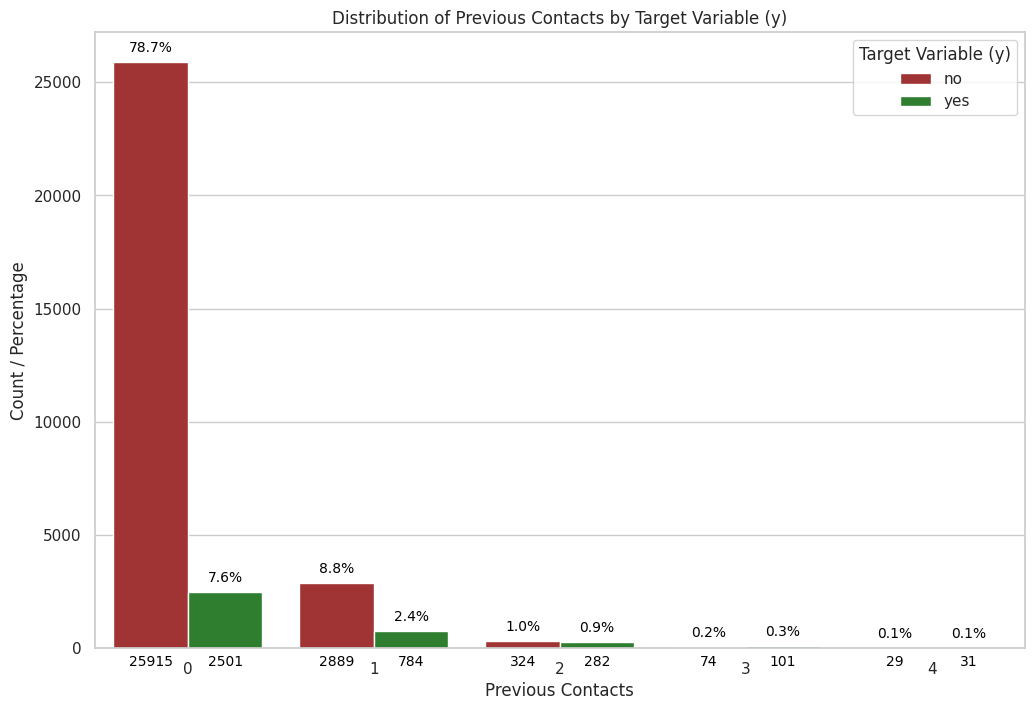

In [ ]:
previous_data = df['previous']
target_variable = df['y']

# Filter data for values 0 through 4
filtered_data = df[df['previous'].between(0, 4)]

# Plot bar plot with counts and percentages for values 0 through 4
plt.figure(figsize=(12, 8))
ax = sns.countplot(x=filtered_data['previous'], hue=filtered_data['y'], palette={'yes': 'forestgreen', 'no': 'firebrick'})
total = len(filtered_data)

# Display percentages on top of each bar
for p in ax.patches:
    height = p.get_height()
    percentage = height / total * 100
    x_position = p.get_x() + p.get_width() / 2.

    ax.annotate(f'{percentage:.1f}%', (x_position, height),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Display counts below each bar
for p in ax.patches:
    height = p.get_height()
    x_position = p.get_x() + p.get_width() / 2.

    ax.annotate(f'{int(height)}', (x_position, 0),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, -15),
                textcoords='offset points')

plt.title('Distribution of Previous Contacts by Target Variable (y)')
plt.xlabel('Previous Contacts')
plt.ylabel('Count / Percentage')
plt.legend(title='Target Variable (y)')

plt.show()

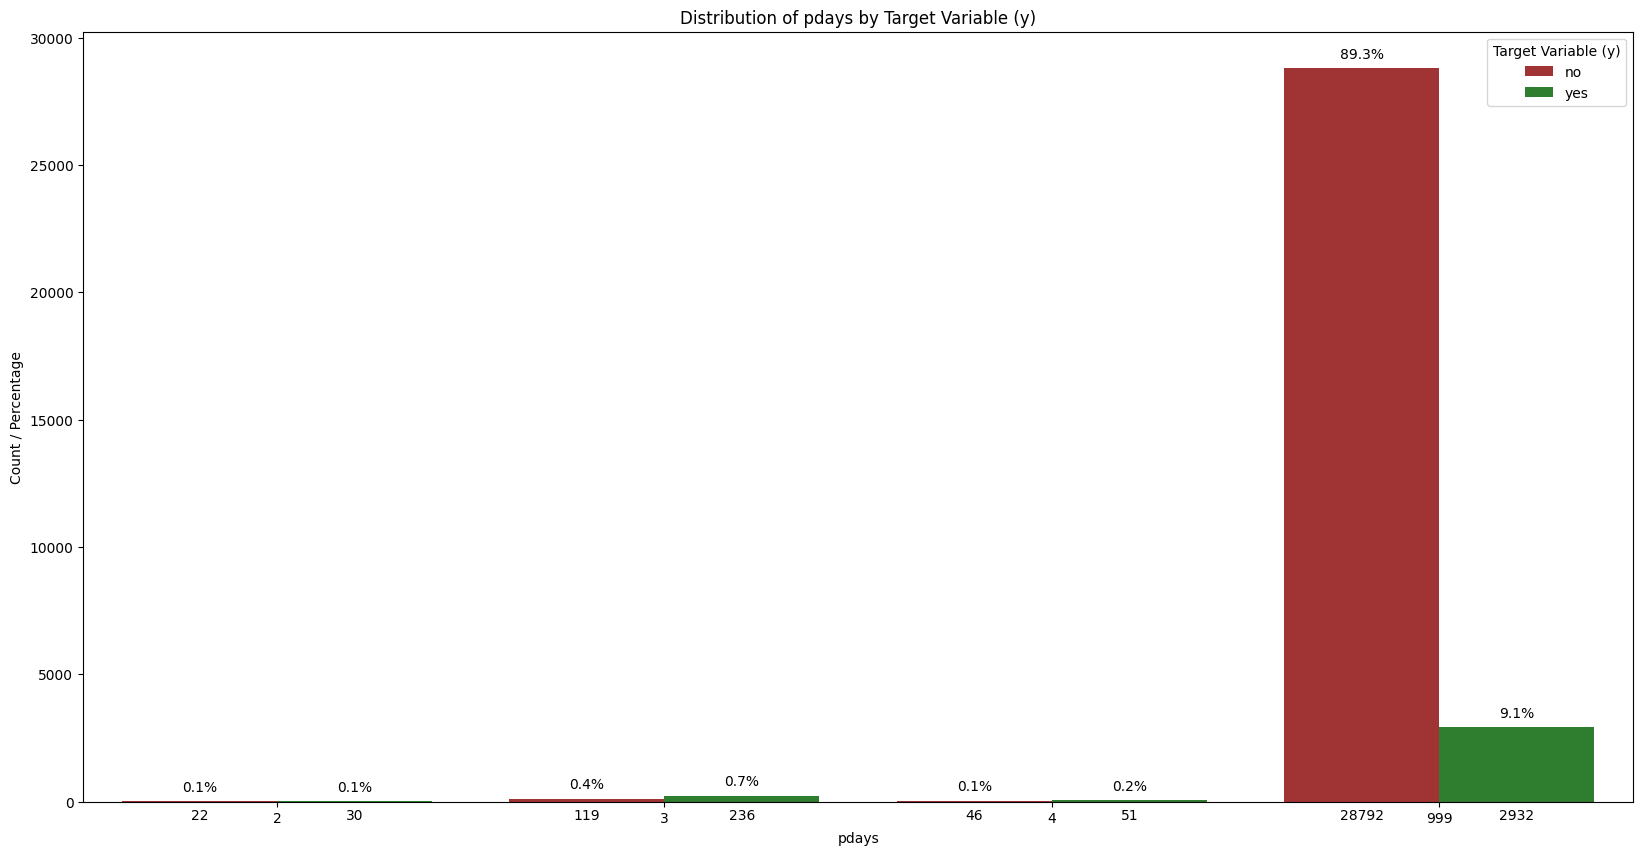

In [ ]:
pdays_data = df['pdays']
target_variable = df['y']

# Filter data for values 0 through 4 and also include '999'
filtered_data = df[df['pdays'].isin([2, 3, 4, 999])]

# Plot bar plot with counts and percentages for values 0 through 4 and '999'
plt.figure(figsize=(20, 10))
ax = sns.countplot(x=filtered_data['pdays'], hue=filtered_data['y'], palette={'yes': 'forestgreen', 'no': 'firebrick'})
total = len(filtered_data)

# Display percentages on top of each bar
for p in ax.patches:
    height = p.get_height()
    percentage = height / total * 100
    x_position = p.get_x() + p.get_width() / 2.

    ax.annotate(f'{percentage:.1f}%', (x_position, height),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Display counts below each bar
for p in ax.patches:
    height = p.get_height()
    x_position = p.get_x() + p.get_width() / 2.

    ax.annotate(f'{int(height)}', (x_position, 0),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, -15),
                textcoords='offset points')

plt.title('Distribution of pdays by Target Variable (y)')
plt.xlabel('pdays')
plt.ylabel('Count / Percentage')
plt.legend(title='Target Variable (y)')

plt.show()

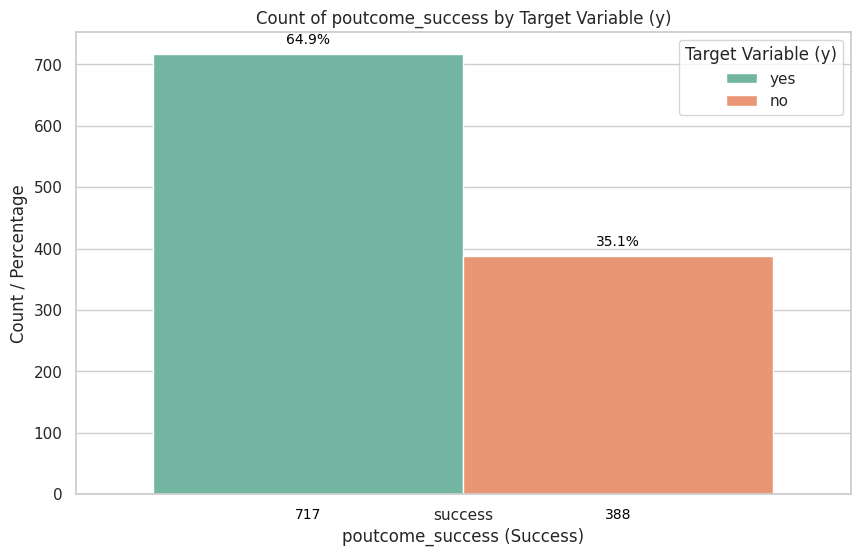

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='poutcome', hue='y', data=df[df['poutcome'] == 'success'], palette='Set2')

total = len(df[df['poutcome'] == 'success'])

# Display percentages on top of each bar
for p in ax.patches:
    height = p.get_height()
    percentage = height / total * 100
    x_position = p.get_x() + p.get_width() / 2.

    ax.annotate(f'{percentage:.1f}%', (x_position, height),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Display counts below each bar with increased spacing
for p in ax.patches:
    height = p.get_height()
    x_position = p.get_x() + p.get_width() / 2.

    ax.annotate(f'{int(height)}', (x_position, 0),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, -20),  # Increase spacing here
                textcoords='offset points')

plt.title('Count of poutcome_success by Target Variable (y)')
plt.xlabel('poutcome_success (Success)')
plt.ylabel('Count / Percentage')
plt.legend(title='Target Variable (y)')

plt.show()

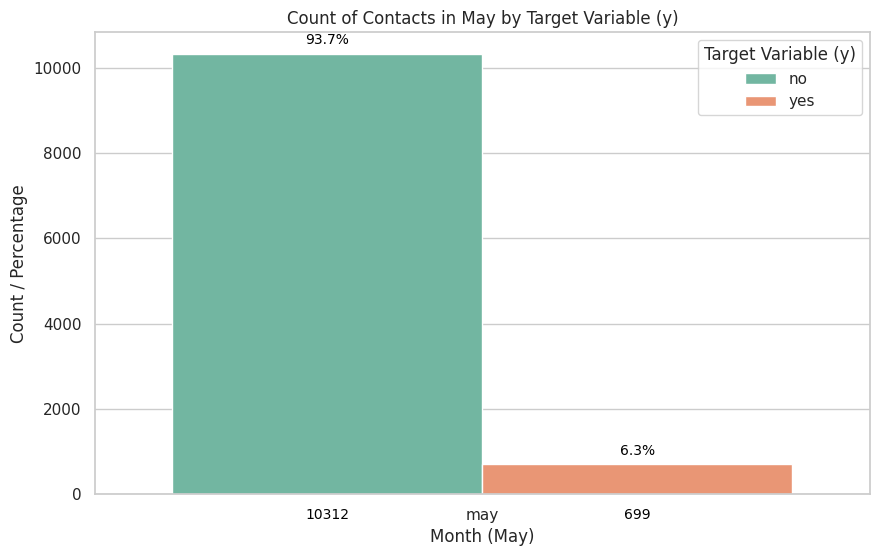

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='month', hue='y', data=df[df['month'] == 'may'], palette='Set2')

total = len(df[df['month'] == 'may'])

# Display percentages on top of each bar
for p in ax.patches:
    height = p.get_height()
    percentage = height / total * 100
    x_position = p.get_x() + p.get_width() / 2.

    ax.annotate(f'{percentage:.1f}%', (x_position, height),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Display counts below each bar with increased spacing
for p in ax.patches:
    height = p.get_height()
    x_position = p.get_x() + p.get_width() / 2.

    ax.annotate(f'{int(height)}', (x_position, 0),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, -20),  # Increase spacing here
                textcoords='offset points')

plt.title('Count of Contacts in May by Target Variable (y)')
plt.xlabel('Month (May)')
plt.ylabel('Count / Percentage')
plt.legend(title='Target Variable (y)')

plt.show()